Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
lat, lon = 6.75189646, -75.19042969
year = 2010
api_key = 'OjVCw5oOv4BRmcldYUf4RIQrWrgIfbRMXISJubzX'
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,wind_speed,cloud_type,fill_flag,relative_humidity,surface_albedo,surface_pressure,wind_direction,dew_point'

leap_year = 'false'
interval = '30'
utc = 'true'
your_name = 'John+Smith'
reason_for_use = 'beta+testing'
your_affiliation = 'my+institution'

your_email = 'matthewlsessions@gmail.com'
mailing_list = 'true'

import pandas as pd

year = '2010'

df1 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df1 = df1.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


year = '2011'

df2 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df2 = df2.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df2])

In [50]:
df1.GHI.sum()

3930098

In [48]:
df1.GHI.sum()

7849115

In [0]:
lat, lon, year = 6.75189646, -75.19042969, 2012
year = '2012'
leap_year = 'true'
dfl = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


dfl = dfl.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

df1 = pd.concat([df1,dfl])

In [0]:
year = '2013'
lat, lon, year = 6.75189646, -75.19042969, 2013
leap_year = 'false'
df3 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df3 = df3.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df3])

In [0]:
year = '2014'

df4 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df4 = df4.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df4])

In [54]:
df1.tail(10)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2011-12-31 19:00:00,2011,12,31,19,0,618,376,321,0.1,24,41.21,7,0,70.13,0.182,850.0,47.1,19
2011-12-31 19:30:00,2011,12,31,19,30,546,338,302,0.1,23,46.56,7,0,74.43,0.182,850.0,47.1,19
2011-12-31 20:00:00,2011,12,31,20,0,499,276,366,0.1,23,52.39,7,0,75.71,0.182,850.0,40.2,19
2011-12-31 20:30:00,2011,12,31,20,30,473,159,601,0.1,22,58.55,7,0,80.41,0.182,850.0,40.2,19
2011-12-31 21:00:00,2011,12,31,21,0,295,184,260,0.1,22,64.94,3,0,82.94,0.182,850.0,33.9,19
2011-12-31 21:30:00,2011,12,31,21,30,272,86,587,0.0,21,71.50,0,0,88.13,0.182,850.0,33.9,19
2011-12-31 22:00:00,2011,12,31,22,0,154,67,422,0.0,21,78.18,0,0,96.81,0.182,850.0,24.0,20
2011-12-31 22:30:00,2011,12,31,22,30,51,35,178,0.0,20,84.95,0,0,100.00,0.182,850.0,24.0,20
2011-12-31 23:00:00,2011,12,31,23,0,0,0,0,0.1,20,91.78,0,0,100.00,0.182,850.0,11.7,20
2011-12-31 23:30:00,2011,12,31,23,30,0,0,0,0.1,20,98.65,0,0,100.00,0.182,850.0,11.7,20


In [52]:
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2011-12-31 19:00:00,2011,12,31,19,30,546,338,302,0.1,23,46.56,7,0,74.43,0.182,850.0,47.1,19
2011-12-31 20:00:00,2011,12,31,20,30,473,159,601,0.1,22,58.55,7,0,80.41,0.182,850.0,40.2,19
2011-12-31 21:00:00,2011,12,31,21,30,272,86,587,0.0,21,71.50,0,0,88.13,0.182,850.0,33.9,19
2011-12-31 22:00:00,2011,12,31,22,30,51,35,178,0.0,20,84.95,0,0,100.00,0.182,850.0,24.0,20
2011-12-31 23:00:00,2011,12,31,23,30,0,0,0,0.1,20,98.65,0,0,100.00,0.182,850.0,11.7,20


In [9]:
year = 2015

df5 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df5 = df5.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df5])
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 21:30:00,2015,12,31,21,30,273,80,607,0.1,25,71.50,0,0,67.53,0.166,850.0,349.1,18
2015-12-31 22:00:00,2015,12,31,22,0,153,65,426,0.1,24,78.18,0,0,76.63,0.166,850.0,328.7,19
2015-12-31 22:30:00,2015,12,31,22,30,50,34,182,0.0,23,84.95,1,0,81.41,0.166,850.0,328.7,19
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.0,22,91.78,0,0,84.25,0.166,850.0,304.9,20
2015-12-31 23:30:00,2015,12,31,23,30,0,0,0,0.0,22,98.65,0,0,84.25,0.166,850.0,304.9,20


In [10]:
!pip install pysolar

In [11]:
from pysolar.solar import *

date = datetime.datetime(2015, 12, 31, 23, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -75.19042969, date)

98.64295895125696

In [0]:
year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [13]:
test.head(3)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2016-01-01 00:00:00,2016,1,1,0,0,0,0,0,0.0,21,105.54,3,0,91.70,0.162,850.0,288.7,20
2016-01-01 00:30:00,2016,1,1,0,30,0,0,0,0.0,20,112.44,1,0,97.51,0.162,850.0,288.7,20
2016-01-01 01:00:00,2016,1,1,1,0,0,0,0,0.0,20,119.32,1,0,98.16,0.162,850.0,271.0,20


In [0]:
dist = df1.copy()

In [0]:
dist = dist[dist.GHI > 40]

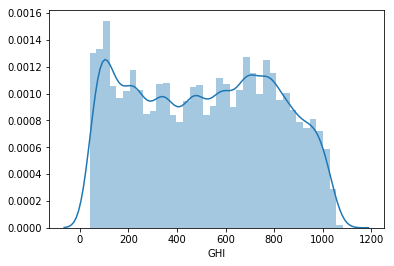

In [16]:
import seaborn as sns

sns.distplot(dist.GHI)

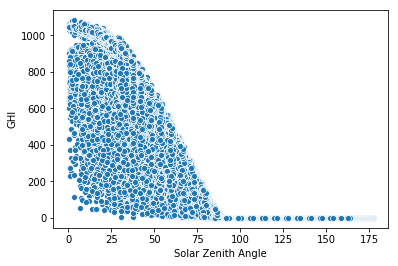

In [37]:
sns.scatterplot(x=df1['Solar Zenith Angle'],y=df1.GHI, data=df1)

In [0]:
features = ['Wind Speed','Temperature','Solar Zenith Angle','Pressure','Surface Albedo']
target = 'GHI'

In [0]:
from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)


In [19]:
boost.fit(df1[features],df1[target])


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
y_pred_train = boost.predict(df1[features])

print(r2_score(df1[target],y_pred_train))
print(mean_absolute_error(df1[target],y_pred_train))

0.9028198742460612
51.88337992051939


In [26]:
y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8840251247142387
56.027977874382096


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


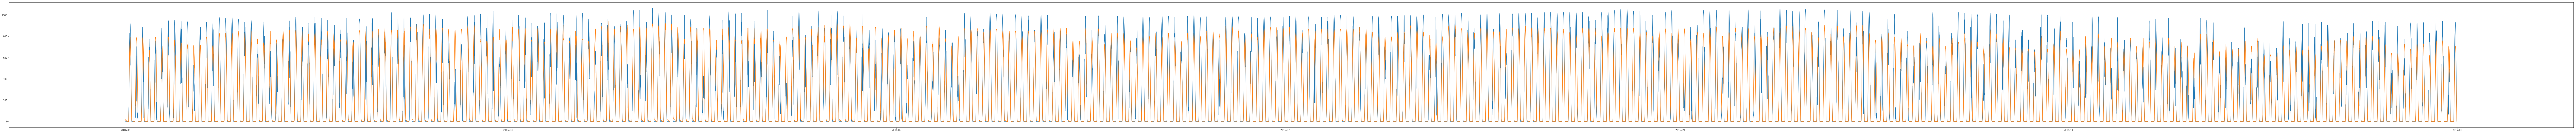

In [27]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(200,10))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)

In [29]:
pip install eli5

     |████████████████████████████████| 112kB 2.9MB/s 


In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    boost,
    scoring='r2', 
    n_iter=2, 
    random_state=42
)

In [34]:
permuter.fit(df1[features], df1[target])


eli5.show_weights(
    permuter, 
    top=None,
    feature_names=features
)

Weight,Feature
1.3907 ± 0.0072,Solar Zenith Angle
0.0490 ± 0.0000,Temperature
0.0047 ± 0.0001,Wind Speed
0.0023 ± 0.0001,Surface Albedo
0.0000 ± 0.0000,Pressure


In [0]:
lat, lon = 25.825, -80.475

year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [36]:
y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8116316220301021
76.83781776030315


In [39]:
df1.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,0.1,18,105.48,0,0,100.00,0.166,850.0,264.8,18
2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,0.1,17,112.38,0,0,100.00,0.166,850.0,264.8,18
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,0.1,17,119.27,0,0,99.69,0.166,860.0,251.1,17
2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,0.1,17,126.12,0,0,100.00,0.166,860.0,251.1,17
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,0.1,17,132.90,0,0,100.00,0.166,860.0,239.5,17


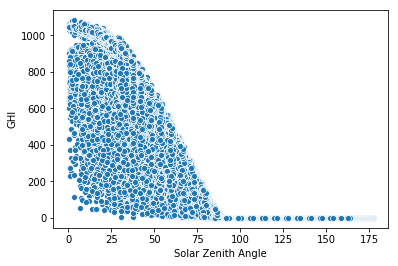

In [38]:
sns.scatterplot(x=df1['Solar Zenith Angle'],y=df1.GHI, data=df1)

In [0]:
high = df1[(df1['Solar Zenith Angle'] < 10) & (df1['Solar Zenith Angle'] > 9)]

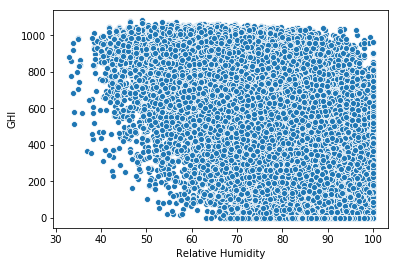

In [44]:
sns.scatterplot(x=df1['Relative Humidity'],y=df1.GHI, data=df1)

In [0]:
https://maps.nrel.gov/nsrdb-viewer/?aL=j0s5CD%255Bv%255D%3Dt%26v7bcnr%255Bv%255D%3Dt%26v7bcnr%255Bd%255D%3D1&bL=clight&cE=0&lR=0&mC=5.61598581915534%2C49.92187499999999&zL=2#